In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data import & Exploration -------------------------------------------------------------------------

In [2]:
seed = 42
np.random.seed(seed)

file = 'data/water_potability.csv'
data = pd.read_csv(file)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
data.isnull().sum()/data.shape[0]

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

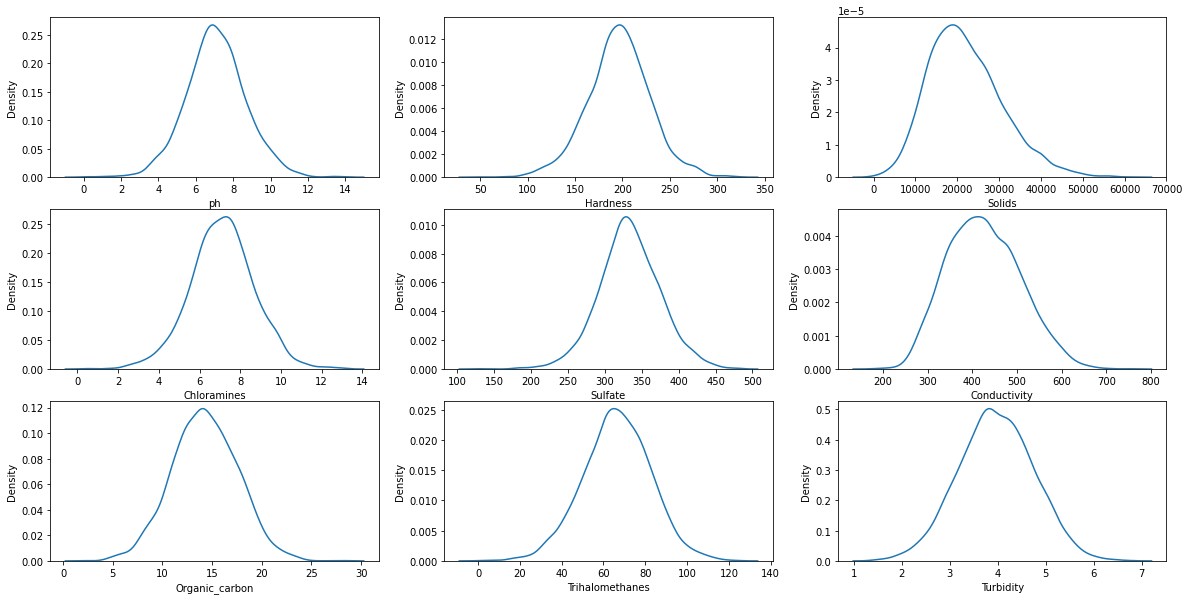

In [6]:
fig, axs = plt.subplots(3,3)
for i in range(data.shape[1]-1):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data[data.columns[i]])
    

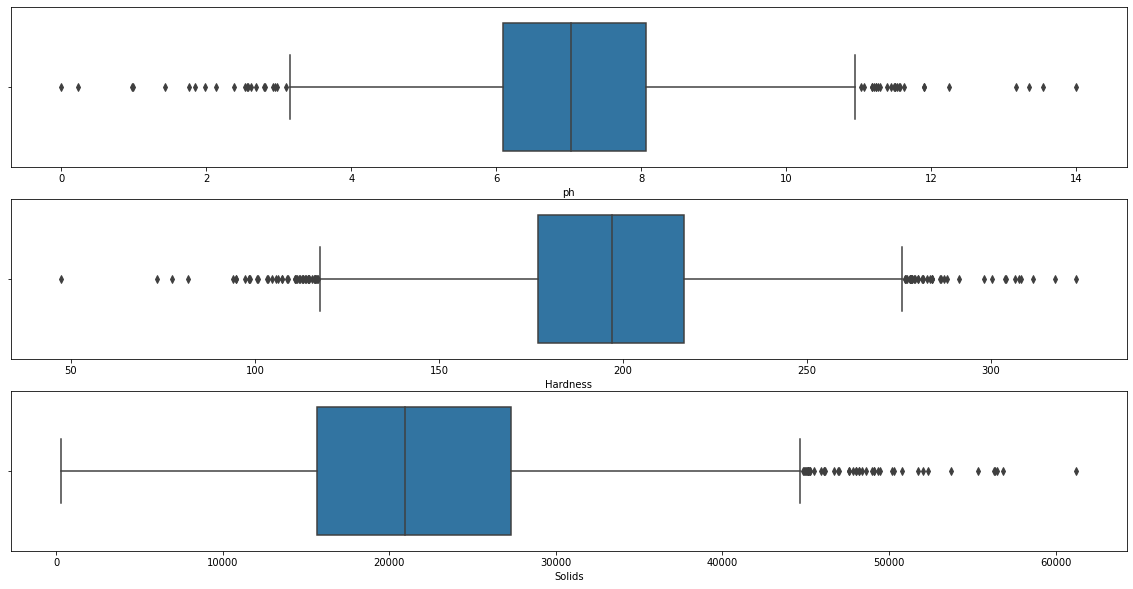

In [7]:
fig, axs = plt.subplots(3,3)
for i in range(3):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=data[data.columns[i]])

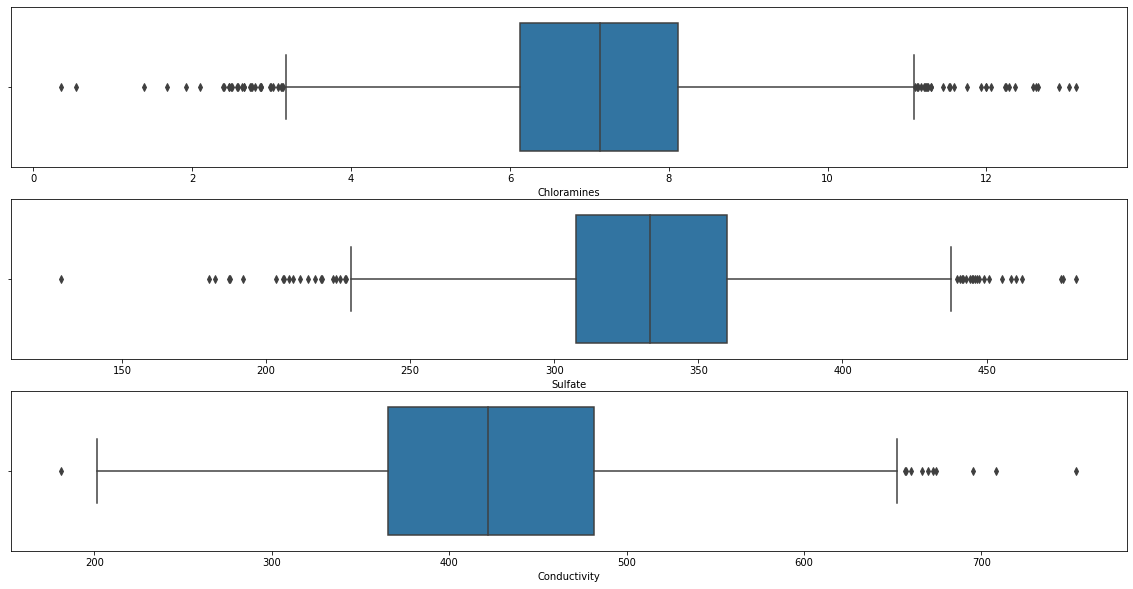

In [8]:
fig, axs = plt.subplots(3,3)
for i in range(3):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=data[data.columns[i+3]])

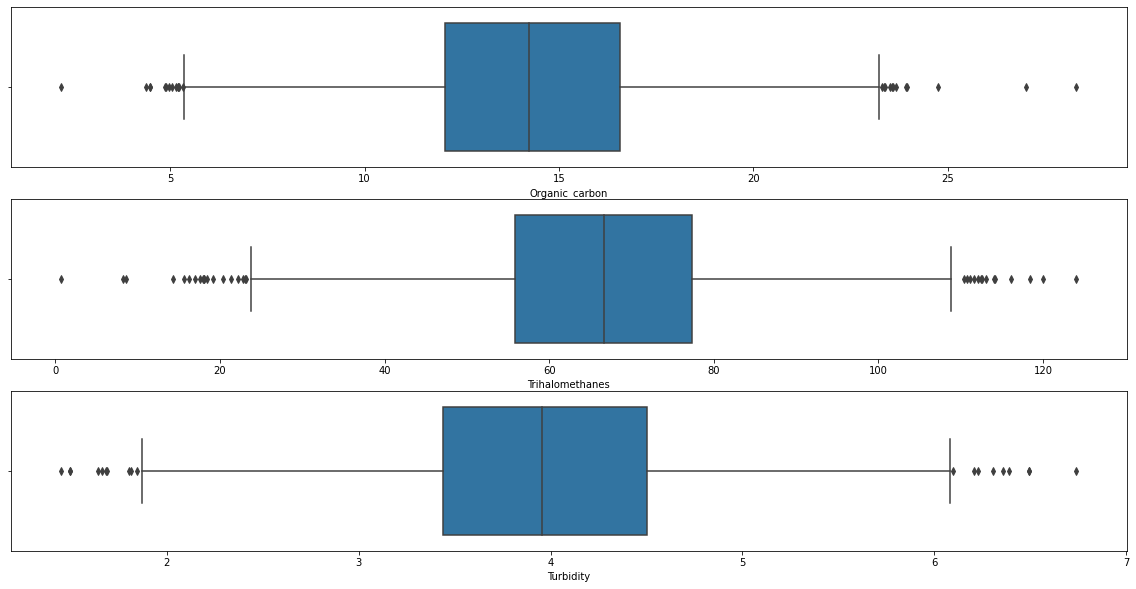

In [9]:
fig, axs = plt.subplots(3,3)
for i in range(3):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=data[data.columns[i+6]])

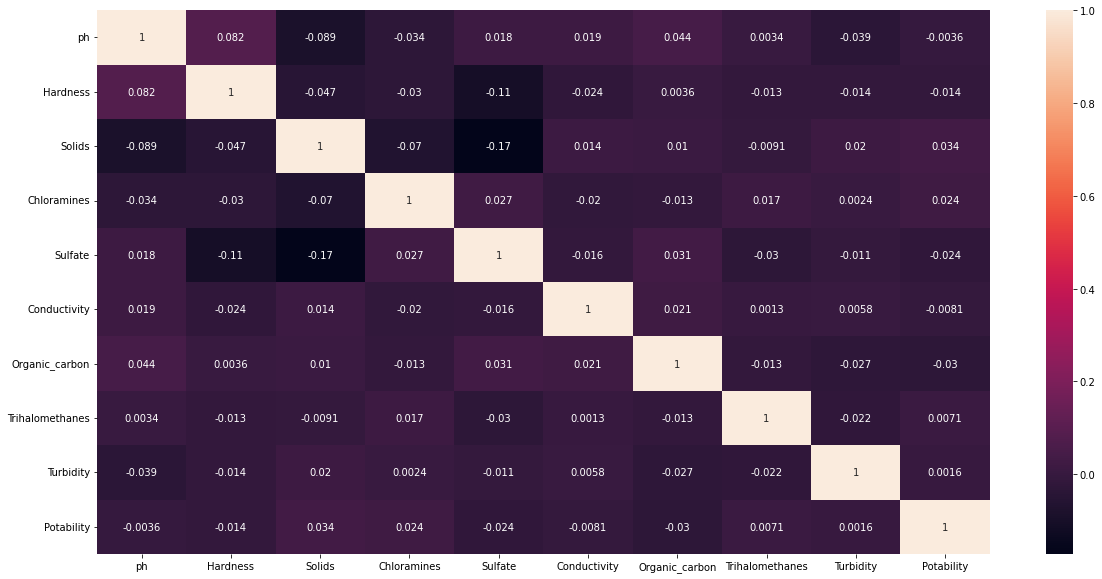

In [10]:
corr_heat = sns.heatmap(data.corr(),annot=True)

In [11]:
data.dropna(inplace=True, subset=['Trihalomethanes'])
data.interpolate(inplace=True)
data.fillna(np.mean(data.ph),inplace=True)
data.isnull().sum()/data.shape[0]

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

# Data pre-processing & transformation-------------------------------------------------------

In [21]:
X, y = data.loc[:, data.columns != 'Potability'], data['Potability']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=seed)
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1937,6.281904,160.306685,17095.270070,6.730577,305.094000,424.446185,14.374967,41.279830,4.457730
2216,9.671797,130.608363,30220.612486,9.309142,370.294867,411.881375,18.024005,76.159718,3.895104
1843,7.754044,193.449854,19019.279505,8.107067,377.990009,597.486041,8.939818,45.721308,3.760298
2253,6.155249,159.519502,19781.610600,10.081610,310.140661,505.108379,16.768604,41.995455,3.803909
271,7.275909,175.220376,22644.766348,7.886855,293.309854,373.345693,17.411683,56.799287,5.062298


In [19]:
scaler = StandardScaler().fit(X_train)
scaled_X_train = pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
scaled_X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1937,-0.525752,-1.090237,-0.562979,-0.253651,-0.726565,-0.024965,0.032703,-1.525033,0.636348
2216,1.696492,-1.983300,0.932943,1.378164,0.932504,-0.179937,1.143988,0.619424,-0.090679
1843,0.439309,-0.093583,-0.343696,0.617445,1.128311,2.109268,-1.622526,-1.251966,-0.264875
2253,-0.608781,-1.113908,-0.256811,1.867011,-0.598150,0.969903,0.761666,-1.481036,-0.208522
271,0.125868,-0.641764,0.069509,0.478086,-1.026419,-0.655227,0.957510,-0.570878,1.417572


# Building model ----------------------------------------------------------------------------------------